In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

c:\Users\Dell\miniconda3\envs\py39\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
data_sub_08 = pd.read_csv(r'C:\Users\Dell\Desktop\workload-estimation\STEW Dataset\sub08_hi.txt', sep='   ')
columns = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

data_sub_08.columns = columns
data_sub_08.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_16480\479857094.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_sub_08 = pd.read_csv(r'C:\Users\Dell\Desktop\workload-estimation\STEW Dataset\sub08_hi.txt', sep='   ')


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4602.05,4761.54,4454.36,4586.15,4303.59,4553.33,4489.74,4343.59,4278.46,4873.85,4515.90,4554.87,4601.03,4464.10
1,4601.54,4761.54,4449.23,4584.10,4304.10,4556.41,4492.82,4349.74,4280.00,4875.90,4514.36,4548.72,4601.03,4454.87
2,4598.46,4755.38,4449.74,4582.56,4299.49,4553.33,4492.82,4352.31,4281.03,4872.82,4510.77,4551.79,4599.49,4457.95
3,4598.97,4751.28,4453.33,4585.13,4294.87,4549.74,4488.72,4350.77,4278.46,4873.33,4512.31,4554.87,4598.46,4462.56
4,4595.90,4758.97,4450.26,4584.10,4296.41,4552.82,4489.23,4350.77,4281.03,4872.82,4512.82,4552.31,4600.51,4460.51


In [7]:
data_sub_08.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19199 entries, 0 to 19198
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     19199 non-null  float64
 1   F7      19199 non-null  float64
 2   F3      19199 non-null  float64
 3   FC5     19199 non-null  float64
 4   T7      19199 non-null  float64
 5   P7      19199 non-null  float64
 6   O1      19199 non-null  float64
 7   O2      19199 non-null  float64
 8   P8      19199 non-null  float64
 9   T8      19199 non-null  float64
 10  FC6     19199 non-null  float64
 11  F4      19199 non-null  float64
 12  F8      19199 non-null  float64
 13  AF4     19199 non-null  float64
dtypes: float64(14)
memory usage: 2.1 MB


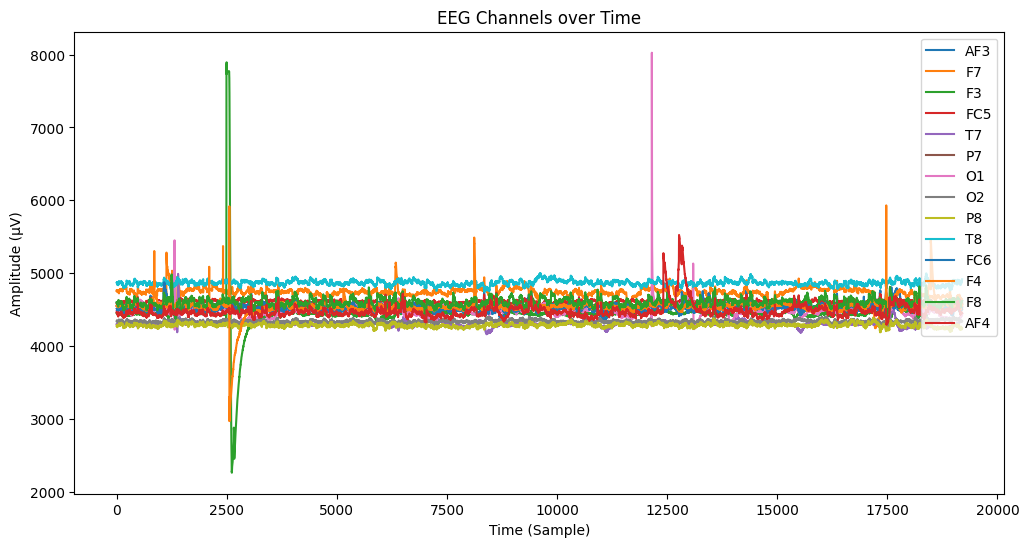

In [8]:
plt.figure(figsize=(12, 6))
for column in data_sub_08.columns:
    plt.plot(data_sub_08.index, data_sub_08[column], label=column)

plt.title("EEG Channels over Time")
plt.xlabel("Time (Sample)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc="upper right")
plt.show()

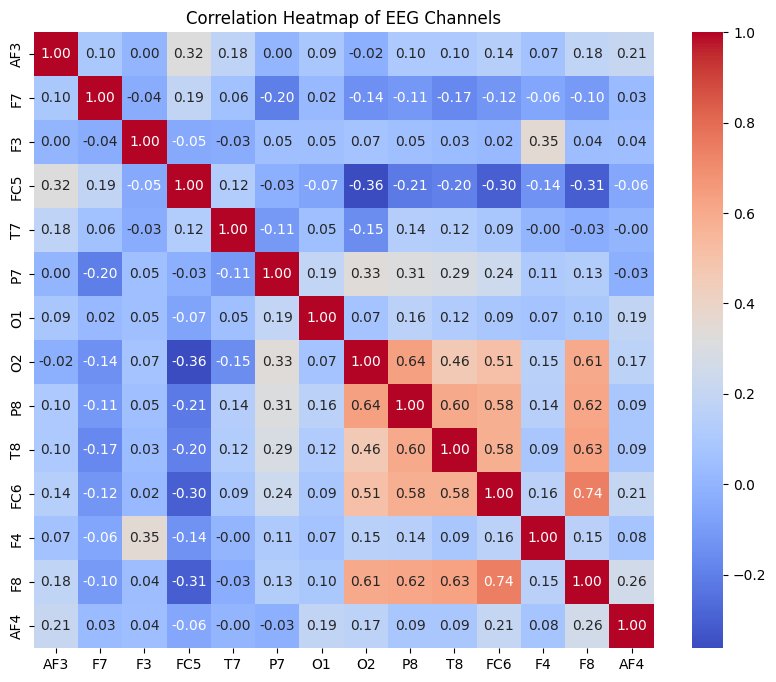

In [9]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data_sub_08.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of EEG Channels")
plt.show()

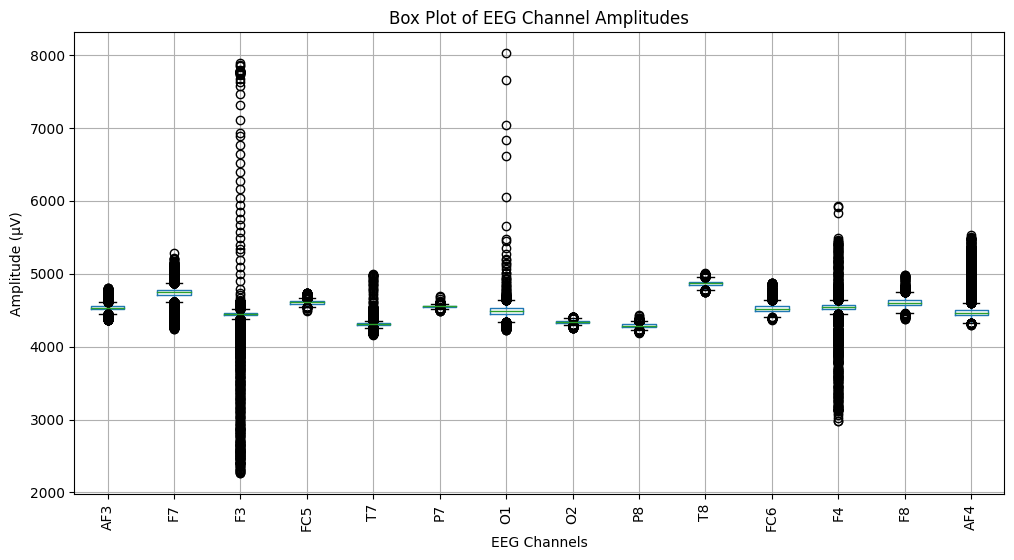

In [10]:
plt.figure(figsize=(12, 6))
data_sub_08.boxplot()
plt.title("Box Plot of EEG Channel Amplitudes")
plt.xlabel("EEG Channels")
plt.ylabel("Amplitude (µV)")
plt.xticks(rotation=90)
plt.show()


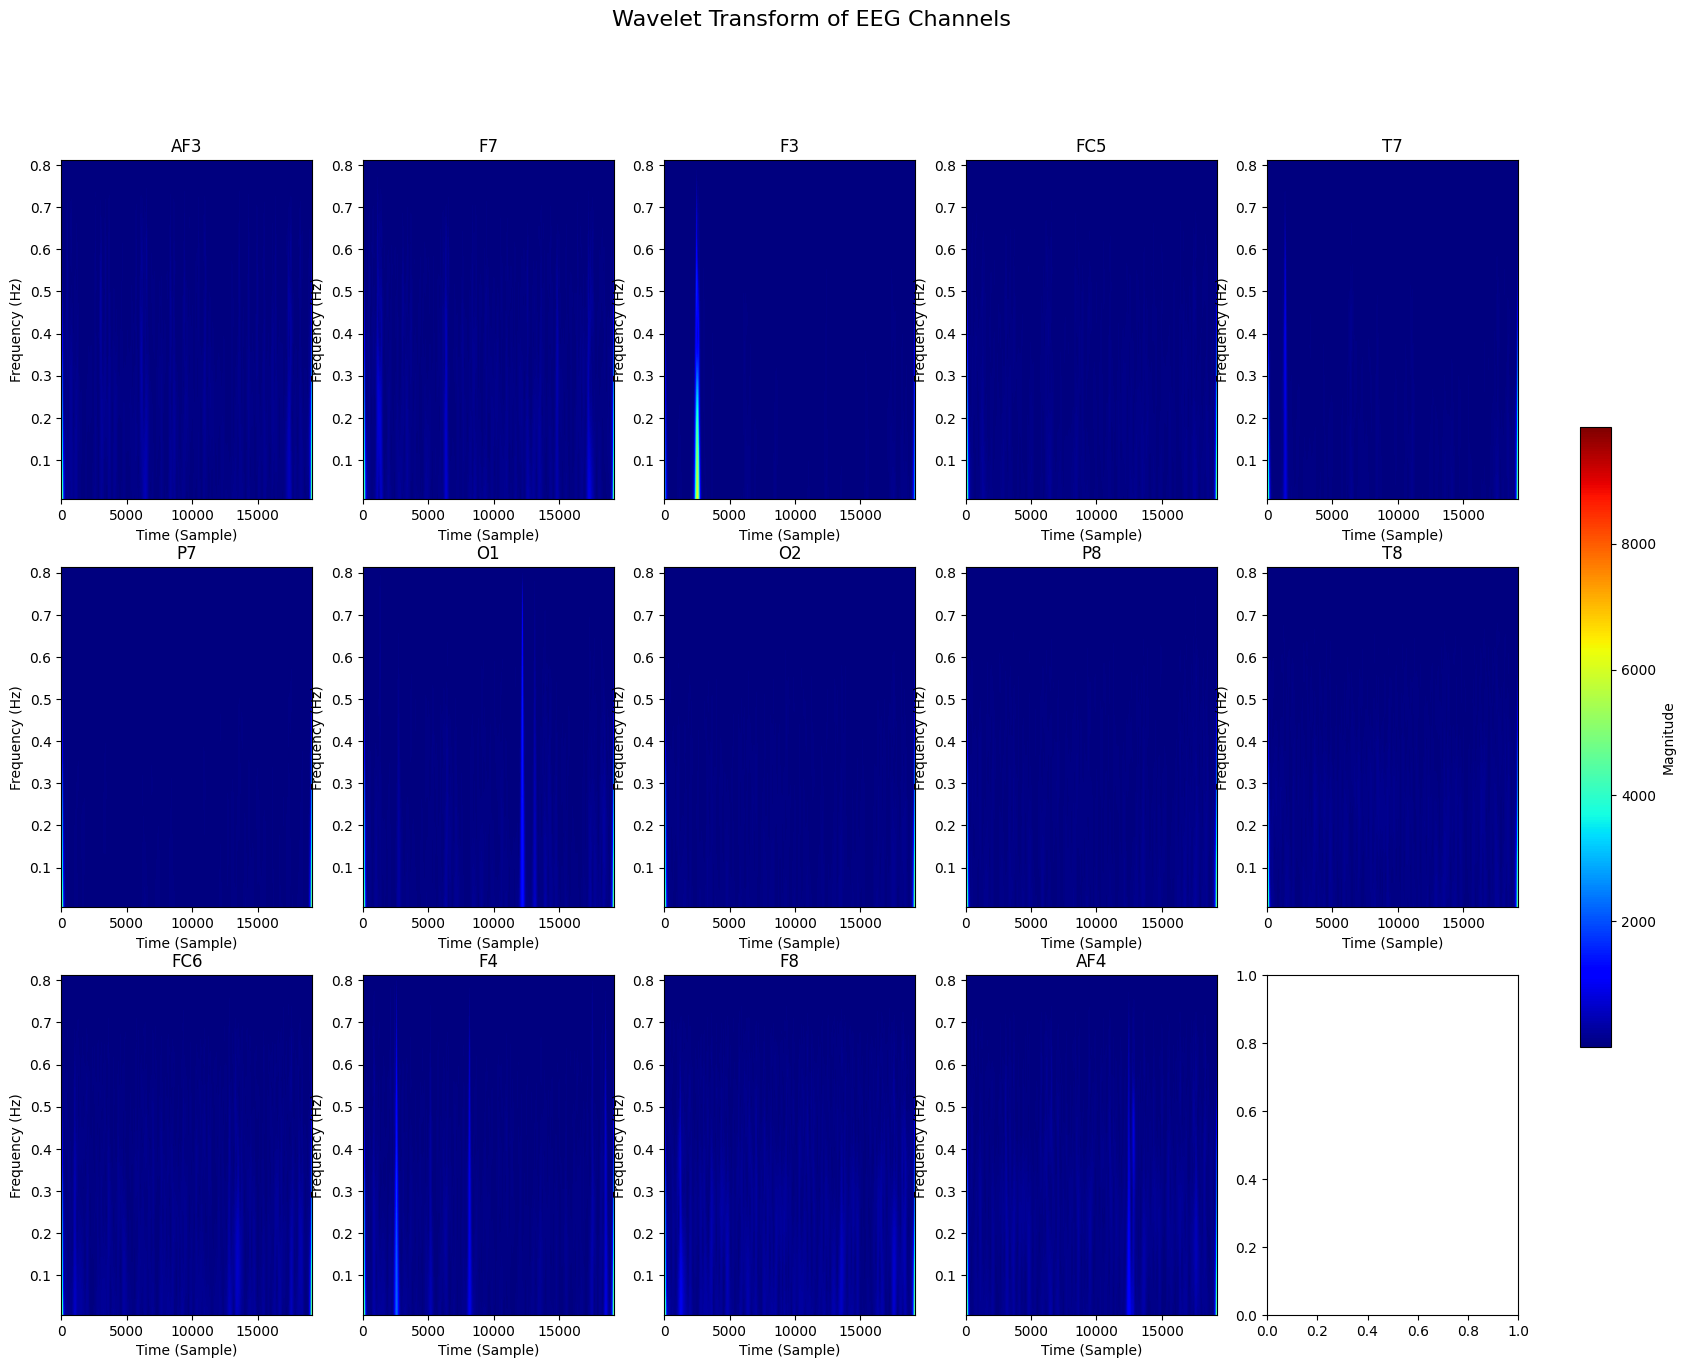

In [14]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# List of EEG channels
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# Set up subplots (number of rows = 3, number of columns = 5)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
fig.suptitle('Wavelet Transform of EEG Channels', fontsize=16)


for i, channel in enumerate(channels):
    row, col = divmod(i, 5)
    channel_data = data_sub_08[channel]  # Assuming 'df' contains EEG data

    # Perform Continuous Wavelet Transform (CWT)
    coefficients, frequencies = pywt.cwt(channel_data, scales=np.arange(1, 128), wavelet='morl')

    # Plot the wavelet transform in the corresponding subplot
    im = axes[row, col].imshow(np.abs(coefficients), aspect='auto',
                               extent=[0, len(channel_data), frequencies.min(), frequencies.max()], cmap='jet')
    axes[row, col].set_title(channel)
    axes[row, col].set_xlabel("Time (Sample)")
    axes[row, col].set_ylabel("Frequency (Hz)")

cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Magnitude')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

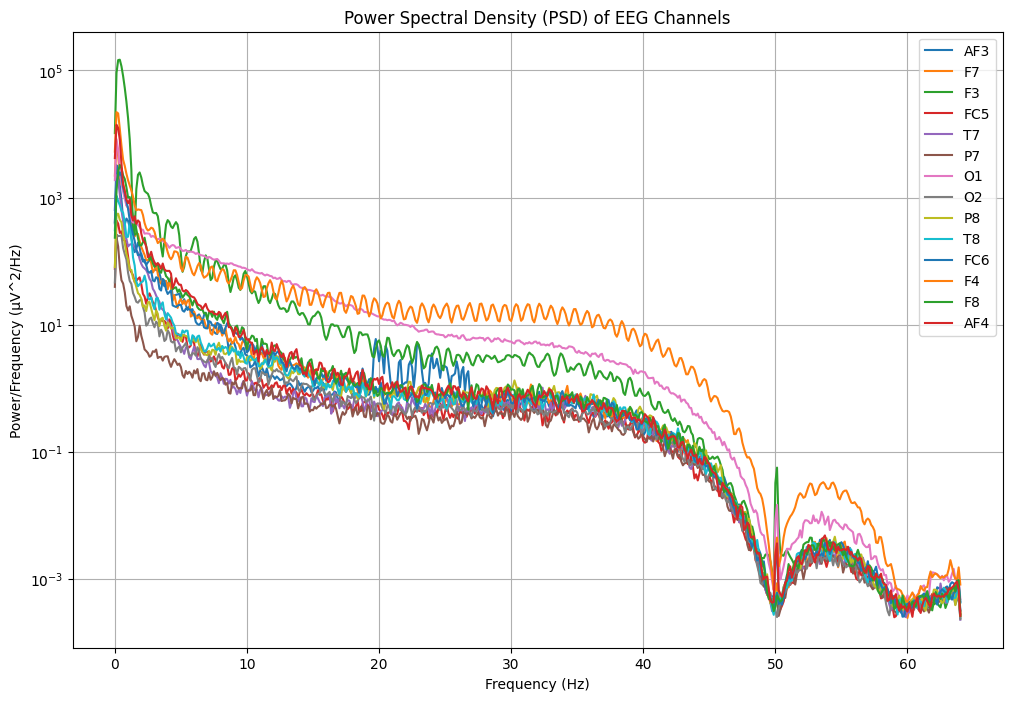

In [16]:
from scipy.signal import welch

plt.figure(figsize=(12, 8))

for column in data_sub_08.columns:
    f, Pxx = welch(data_sub_08[column], fs=128, nperseg=1024)  # sampling frequency (fs) of 128 Hz
    plt.semilogy(f, Pxx, label=column)

plt.title("Power Spectral Density (PSD) of EEG Channels")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (µV^2/Hz)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()